# [Aula 4] Transformações de intensidade

Prof. João Fernando Mari (joaofmari@gmail.com)

Universidade Federal de Viçosa - *campus* Rio Paranaíba

SIN 393 - Introdução à Visão Computacional (2018-2)

<img src='figuras/aula_04/Fig_03.02_OK.png' style="height:300px" Title="Funções de transformação de intensidade. (a) Função de alargamento de contraste. (b) Função de limiarização.">

*FIGURA 1: Funções de transformação de intensidade. (a) Função de alargamento de contraste. (b) Função de limiarização. Fonte [2]*

<img src='figuras/aula_04/FigXX.TransformacaoIntensidade.png' style="height:600px">

*FIGURA 2: Ilustração do processamento de uma imagem em níveis de cinza (3 bits) por uma função de transformação.*

## Histograma

In [1]:
import numpy as np
from skimage import data
import imageio

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib notebook

## im = imageio.imread('minha_imagem.png') # Abre a imagem 
im = data.camera()

print('Tamanho da imagem: %d, %d' % (im.shape[0], im.shape[1]))
print('Tipo de dado: %s' % im.dtype)
print('Menor intensidade: %.4f ' % im.min())
print('Maior intensidade: %.4f ' % im.max())

Tamanho da imagem: 512, 512
Tipo de dado: uint8
Menor intensidade: 0.0000 
Maior intensidade: 255.0000 


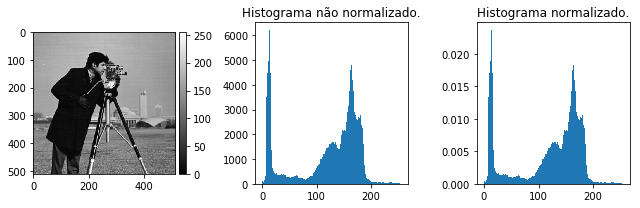

In [2]:
# Figura com 1 linha e duas colunas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3))
# Plota imagem
im_ = ax1.imshow(im, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_, cax=cax)
# Plota histograma
ax2.hist(im.ravel(), bins=256)
ax2.set_title('Histograma não normalizado.')
# Plota histograma
# ax3.hist(im.ravel(), bins=256, density=True)
weights = np.ones(im.ravel().shape)/float(im.size)
ax3.hist(im.ravel(), bins=256, weights=weights)
ax3.set_title('Histograma normalizado.')

plt.tight_layout()
plt.show()

### Tipos de dados

Imagens com tipo de dados inteiro sem sinal de 8 bits:
* Valores iteiros entre 0 e 255

Imagens com tipo de dados float:
* Valores reais entre 0 e 1

In [3]:
from skimage import img_as_float

im = img_as_float(im)

print('Tamanho da imagem: %d, %d' % (im.shape[0], im.shape[1]))
print('Tipo de dado: %s' % im.dtype)
print('Menor intensidade: %.4f ' % im.min())
print('Maior intensidade: %.4f ' % im.max())

Tamanho da imagem: 512, 512
Tipo de dado: float64
Menor intensidade: 0.0000 
Maior intensidade: 1.0000 


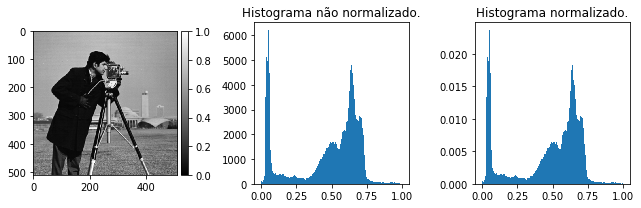

In [4]:
# Figura com 1 linha e duas colunas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
# Plota imagem
im_ = ax1.imshow(im, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_, cax=cax)
# Plota histograma
ax2.hist(im.ravel(), bins=256)
ax2.set_title('Histograma não normalizado.')
# Plota histograma
### ax3.hist(im.ravel(), bins=256, density=True)
weights = np.ones(im.ravel().shape)/float(im.size)
ax3.hist(im.ravel(), bins=256, weights=weights)
ax3.set_title('Histograma normalizado.')


plt.tight_layout()
plt.show()

## Funções básicas de transformação

<img src='figuras/aula_04/Fig_03.03_OK.png' style="height:400px">

*FIGURA 3: Ilustração de agumas funções básicas de transformação: identidade; negativa; logaritmica e gama. Fonte: [2]*

### Negativo

In [5]:
from skimage import data, util

im = data.camera()

im = img_as_float(im)
im_neg = util.invert(im)

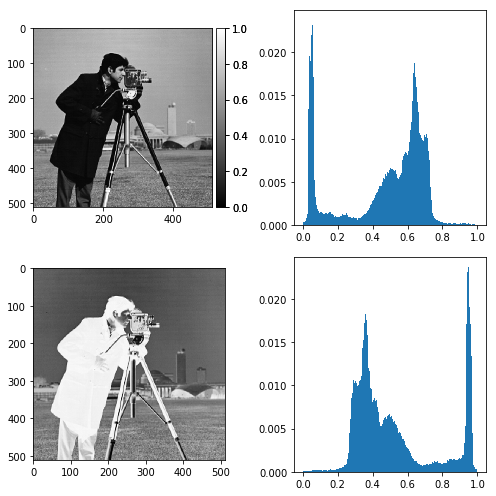

In [6]:
# Figura com 1 linha e duas colunas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 7))

# Plota imagem
im_ = ax1.imshow(im, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_, cax=cax)
# Plota histograma normalizado
### ax2.hist(im.ravel(), bins=256, density=True)
weights = np.ones(im.ravel().shape)/float(im.size)
ax2.hist(im.ravel(), bins=256, weights=weights)

# Plota imagem
im_ = ax3.imshow(im_neg, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_, cax=cax)
# Plota histograma normalizado
weights = np.ones(im_neg.ravel().shape)/float(im_neg.size)
ax4.hist(im_neg.ravel(), bins=256, weights=weights)

plt.tight_layout()
plt.show()

### Transformações de potência (gama)

In [7]:
import numpy as np
from skimage import data, exposure

im = data.moon()

im =  img_as_float(im)

print('Tamanho da imagem: %d, %d' % (im.shape[0], im.shape[1]))
print('Tipo de dado: %s' % im.dtype)
print('Menor intensidade: %.4f ' % im.min())
print('Maior intensidade: %.4f ' % im.max())

Tamanho da imagem: 512, 512
Tipo de dado: float64
Menor intensidade: 0.0000 
Maior intensidade: 1.0000 


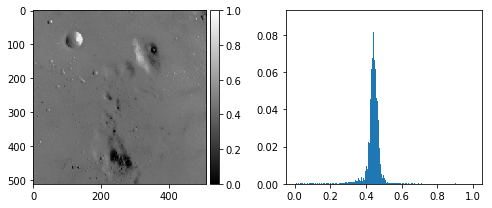

In [8]:
# Figura com 1 linha e duas colunas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
# Plota imagem
im_ = ax1.imshow(im, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_, cax=cax)
# Plota histograma
### ax2.hist(im.ravel(), bins=256, density=True)
weights = np.ones(im.ravel().shape)/float(im.size)
ax2.hist(im.ravel(), bins=256, weights=weights)

plt.tight_layout()
plt.show()

In [9]:
gamas= [0.05, 0.5, 1, 2.5, 25.]

im_list = []
for gama in gamas:
    im_temp = exposure.adjust_gamma(im, gama)
    im_list.append(im_temp)

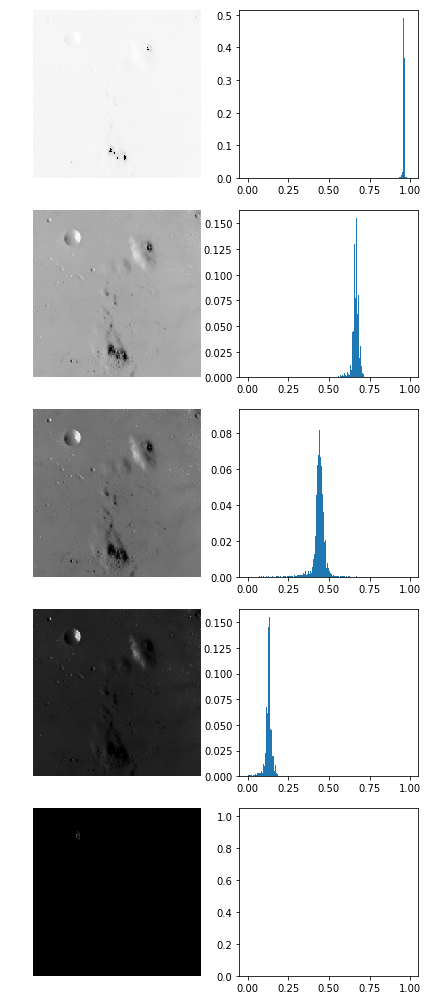

In [10]:
# Figura com 1 linha e duas colunas
fig, ax = plt.subplots(5, 2, figsize=(6, 14))
for i in range(5):
    # Plota imagem
    im_ = ax[i, 0].imshow(im_list[i], cmap='gray')
    ax[i, 0].axis('off')

    # Plota histograma
    ### ax[i, 1].hist(im_list[i].ravel(), bins=256, density=True)
    weights = np.ones(im_list[i].ravel().shape)/float(im_list[i].size)
    ax[i, 1].hist(im_list[i].ravel(), bins=256, weights=weights)
    
plt.tight_layout()
plt.show()

#### Plotando as funções de transformação

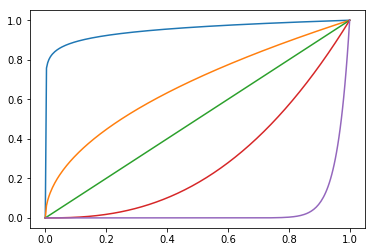

In [11]:
l = np.linspace(0,1,256)

plt.figure()

for i, gama in enumerate(gamas):
    plt.plot(l, l**gama)
    
plt.show()  

### Tranformações logarítmicas

In [12]:
im_log_1p = exposure.adjust_log(im, 1)

im_log_1n = exposure.adjust_log(im, -1)

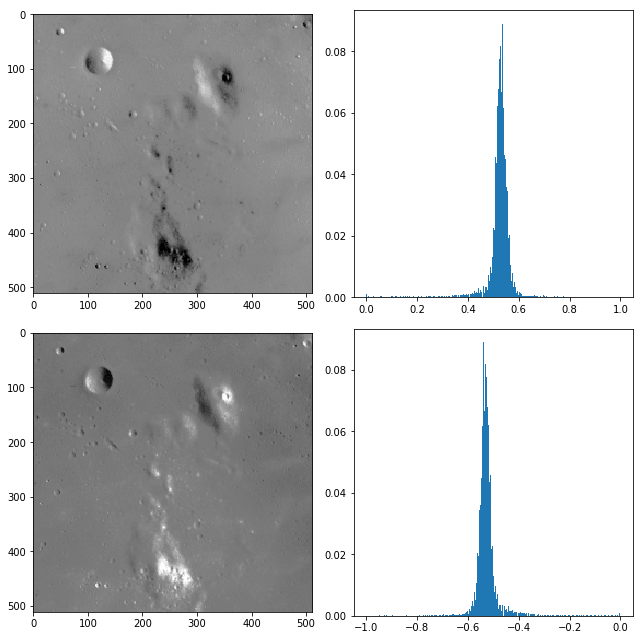

In [13]:
# Figura com 1 linha e duas colunas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 9))

# Plota imagem
ax1.imshow(im_log_1p, cmap='gray')
# Plota histograma
### ax2.hist(im_log_1p.ravel(), bins=256, density=True)
weights = np.ones(im_log_1p.ravel().shape)/float(im_log_1p.size)
ax2.hist(im_log_1p.ravel(), bins=256, weights=weights)

# Plota imagem
ax3.imshow(im_log_1n, cmap='gray')
# Plota histograma
### ax4.hist(im_log_1n.ravel(), bins=256, density=True)
weights = np.ones(im_log_1n.ravel().shape)/float(im_log_1n.size)
ax4.hist(im_log_1n.ravel(), bins=256, weights=weights)

plt.tight_layout()
plt.show()

#### Plotando as funções de transformação

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


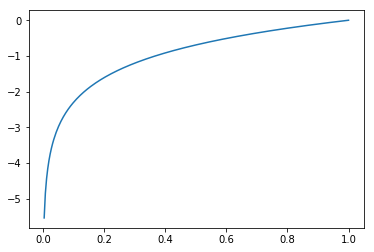

In [14]:
l = np.linspace(0,1,256)

plt.figure()

plt.plot(l, np.log(l))
    
plt.show()  

C:\Users\Joao\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


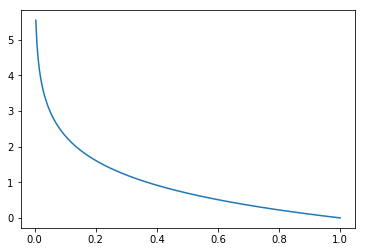

In [15]:
l = np.linspace(0,1,256)

plt.figure()

plt.plot(l, -1 * np.log(l))
    
plt.show()  

### Alargamento de contraste

In [16]:
import numpy as np
from skimage import data, img_as_float, exposure
import matplotlib.pyplot as plt

# Abre uma imagem de baixo contraste
im = data.moon()      
# Converte para float (0-1.)
im = img_as_float(im) 
print(im.shape, im.min(), im.max(), im.mean(), im.std())

(512, 512) 0.0 1.0 0.43988067028569255 0.052275651811208565


In [17]:
im_al1 = exposure.rescale_intensity(im)
print(im.shape, im.min(), im.max(), im.mean(), im.std())

(512, 512) 0.0 1.0 0.43988067028569255 0.052275651811208565


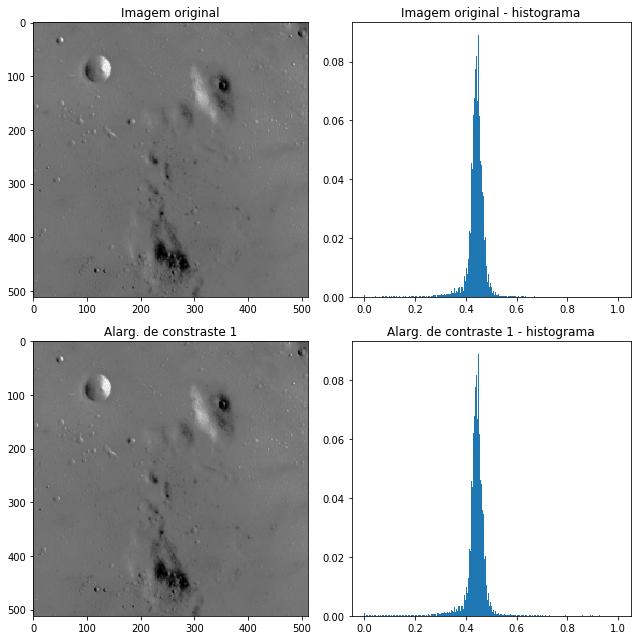

In [18]:
# Mostra as imagens na tela.
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
plt.imshow(im, cmap='gray')
plt.title('Imagem original')

plt.subplot(2,2,3)
plt.imshow(im_al1, cmap='gray')
plt.title('Alarg. de constraste 1')

plt.subplot(2,2,2)
### plt.hist(im.flatten(), 256, range=(0, 1.), density=True)
weights = np.ones(im.ravel().shape)/float(im.size)
plt.hist(im.ravel(), bins=256, weights=weights)
plt.title('Imagem original - histograma')

plt.subplot(2,2,4)
### plt.hist(im_al1.flatten(), 256, range=(0, 1.), density=True)
weights = np.ones(im_al1.ravel().shape)/float(im_al1.size)
plt.hist(im_al1.ravel(), bins=256, weights=weights)
plt.title('Alarg. de contraste 1 - histograma')

plt.tight_layout()
plt.show()

In [19]:
# Alargamento de contraste 2
im_al2 = exposure.rescale_intensity(im, (0.2,0.6), (0.0,1.0))

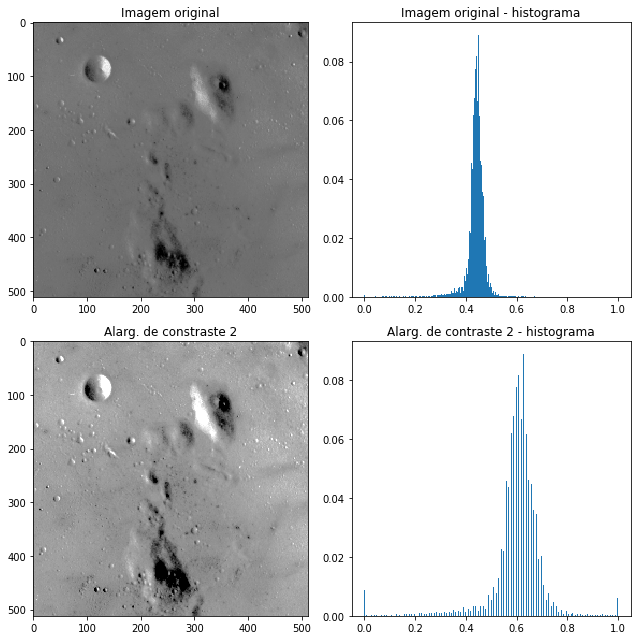

In [20]:
plt.figure(figsize=(9, 9))

plt.subplot(2,2,1)
plt.imshow(im, cmap='gray')
plt.title('Imagem original')

plt.subplot(2,2,3)
plt.imshow(im_al2, cmap='gray')
plt.title('Alarg. de constraste 2')

plt.subplot(2,2,2)
### plt.hist(im.flatten(), 256, range=(0, 1.), density=True)
weights = np.ones(im.ravel().shape)/float(im.size)
plt.hist(im.ravel(), bins=256, weights=weights)
plt.title('Imagem original - histograma')

plt.subplot(2,2,4)
### plt.hist(im_al2.flatten(), 256, range=(0, 1.), density=True)
weights = np.ones(im_al2.ravel().shape)/float(im_al2.size)
plt.hist(im_al2.ravel(), bins=256, weights=weights)
plt.title('Alarg. de contraste 2 - histograma')

plt.tight_layout()
plt.show()

### Equalização de histograma

<img src='figuras/aula_04/Fig_03.19_OK.png' style="height:300px">

*FIGURA 4: Ilustração da equalização de histograma de uma imagem de 3 bits (8 níveis de intensidade). (a) Histograma da imagem original. (b) Função de transformação. (c) Histograma da imagem equalizada. Fonte: [2]*

<img src='figuras/aula_04/Fig_03.20_OK.png' style="height:600px">

*FIGURA 5: Imagens com distribuições de intensidades diferentes: escura, clara, baixo contraste e alto contraste. Imagens resultantes da equalização dos histogramas e os histogramas das imagens após a equalização. Fonte: [2]*

<img src='figuras/aula_04/Fig_03.21_OK.png' style="height:400px">

*FIGURA 6: Funções de transformação geradas pelo algoritmo de equalização de histograma para as imagens da Figura 5. Fonte: [2]*

In [21]:
im_eq = exposure.equalize_hist(im)

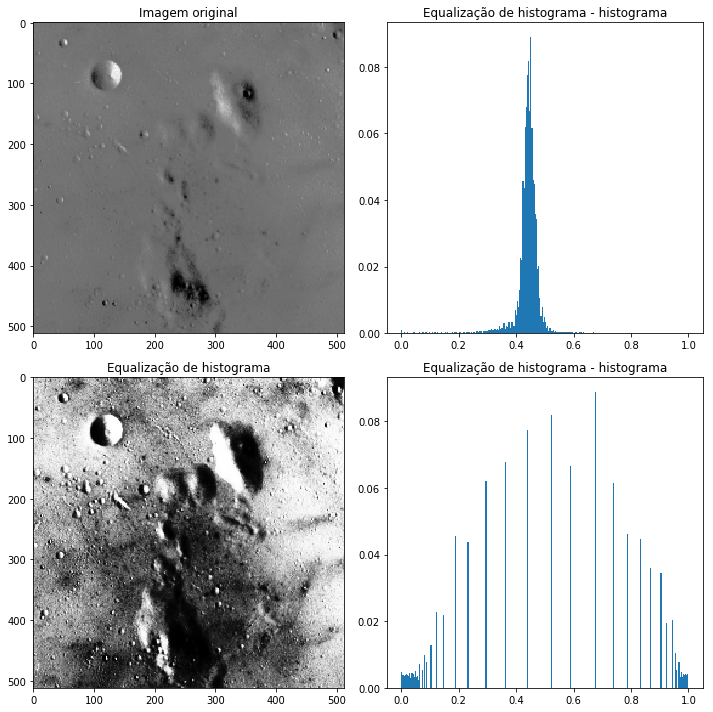

In [22]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(im, cmap='gray')
plt.title('Imagem original')

plt.subplot(2,2,3)
plt.imshow(im_eq, cmap='gray')
plt.title('Equalização de histograma')

plt.subplot(2,2,2)
### plt.hist(im.flatten(), 256, range=(0, 1.), density=True)
weights = np.ones(im.ravel().shape)/float(im.size)
plt.hist(im.ravel(), bins=256, weights=weights)
plt.title('Equalização de histograma - histograma')

plt.subplot(2,2,4)
### plt.hist(im_eq.flatten(), 256, range=(0, 1.), density=True)
weights = np.ones(im_eq.ravel().shape)/float(im_eq.size)
plt.hist(im_eq.ravel(), bins=256, weights=weights)
plt.title('Equalização de histograma - histograma')

plt.tight_layout()
plt.show()

## Bibliografia

[1] **Scipy Lecture Notes**. 2017
    * Disponível em: http://www.scipy-lectures.org/

<img src='figuras/aula_04/scipy_ln_OK.png' style="height:500px">

[2] GONZALEZ, R.C.; WOODS, R.E. Processamento de Imagens Digitais. 3. ed. Pearson, 2010.